In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 125)
pd.set_option('display.max_rows', 100)
%matplotlib inline

In [3]:
df1 = pd.read_csv('./application_data.csv') # Write your code for importing the csv file here
df2 = pd.read_csv('./previous_application.csv') # Write your code for importing the csv file here

### Merge Both Data frame

In [4]:
df3 = df1.merge(df2, on='SK_ID_CURR', how='outer')

#### Load and display shape of data

In [5]:
df1.shape

(307511, 122)

In [6]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

## show all column info

In [7]:
# Display all columns with datatypes
df1.info(max_cols=125)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

### Remove Column more then 50% null, also drop unused column

In [8]:


# Remove Columns which are more then 50% of null values
df1 = df1.loc[:, df1.isnull().mean() < .5]

# Remove unused column
df1.drop(['FLAG_EMAIL','FLAG_PHONE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
        'REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
         'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
         'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
         'LIVE_CITY_NOT_WORK_CITY','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG',
         'YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE',
         'EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], axis=1, inplace=True)


### Impute the columns with 'Mode' value

In [9]:
# impute Rows
mode_value1 = df1.NAME_TYPE_SUITE.mode()[0]
df1['NAME_TYPE_SUITE'].fillna(mode_value1, inplace=True)
df1.EXT_SOURCE_2.fillna(df1.EXT_SOURCE_2.mode()[0], inplace=True)
df1.OCCUPATION_TYPE.fillna('Blank Occupation', inplace=True)
# Remove row
df1 = df1[~np.isnan(df1['EXT_SOURCE_3'])]

# Impute Row
df1['NAME_TYPE_SUITE'].fillna(df1.AMT_GOODS_PRICE.mode()[0], inplace=True)

### Calucate Null % of columns

In [10]:
# Find the null value % of columns
round(df1.isnull().mean() *100, 2)
# df1.columns

SK_ID_CURR              0.00
TARGET                  0.00
NAME_CONTRACT_TYPE      0.00
CODE_GENDER             0.00
FLAG_OWN_CAR            0.00
FLAG_OWN_REALTY         0.00
CNT_CHILDREN            0.00
AMT_INCOME_TOTAL        0.00
AMT_CREDIT              0.00
AMT_ANNUITY             0.00
AMT_GOODS_PRICE         0.09
NAME_TYPE_SUITE         0.00
NAME_INCOME_TYPE        0.00
NAME_EDUCATION_TYPE     0.00
NAME_FAMILY_STATUS      0.00
NAME_HOUSING_TYPE       0.00
DAYS_BIRTH              0.00
DAYS_EMPLOYED           0.00
DAYS_REGISTRATION       0.00
DAYS_ID_PUBLISH         0.00
FLAG_MOBIL              0.00
OCCUPATION_TYPE         0.00
CNT_FAM_MEMBERS         0.00
REGION_RATING_CLIENT    0.00
ORGANIZATION_TYPE       0.00
EXT_SOURCE_2            0.00
EXT_SOURCE_3            0.00
FLAG_DOCUMENT_2         0.00
dtype: float64

### Change data type of the Target Column

In [11]:
# change data type
df1.TARGET = df1.TARGET.astype(object)
# print(df1.CNT_CHILDREN.value_counts())
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246546 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SK_ID_CURR            246546 non-null  int64  
 1   TARGET                246546 non-null  object 
 2   NAME_CONTRACT_TYPE    246546 non-null  object 
 3   CODE_GENDER           246546 non-null  object 
 4   FLAG_OWN_CAR          246546 non-null  object 
 5   FLAG_OWN_REALTY       246546 non-null  object 
 6   CNT_CHILDREN          246546 non-null  int64  
 7   AMT_INCOME_TOTAL      246546 non-null  float64
 8   AMT_CREDIT            246546 non-null  float64
 9   AMT_ANNUITY           246535 non-null  float64
 10  AMT_GOODS_PRICE       246336 non-null  float64
 11  NAME_TYPE_SUITE       246546 non-null  object 
 12  NAME_INCOME_TYPE      246546 non-null  object 
 13  NAME_EDUCATION_TYPE   246546 non-null  object 
 14  NAME_FAMILY_STATUS    246546 non-null  object 
 15  

### Rename the columns and Treat the columns values

In [12]:
# Change the column name and convert data into year.
df1.rename(columns={"DAYS_BIRTH":"YEARS_BIRTH","DAYS_EMPLOYED": "YEARS_EMPLOYED",
                    "DAYS_EMPLOYED": "YEARS_EMPLOYED", "DAYS_REGISTRATION":'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'},
           inplace=True)

df1.YEARS_BIRTH = df1.YEARS_BIRTH.apply(lambda x: abs(x//365))
df1.YEARS_EMPLOYED = df1.YEARS_EMPLOYED.apply(lambda x: abs(x//365))
df1.YEARS_REGISTRATION = df1.YEARS_REGISTRATION.apply(lambda x: abs(x//365))
df1.YEARS_ID_PUBLISH = df1.YEARS_ID_PUBLISH.apply(lambda x: abs(x//365))

df1.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002      1         Cash loans           M            N   
2      100004      0    Revolving loans           M            Y   
5      100008      0         Cash loans           M            N   
6      100009      0         Cash loans           F            Y   
7      100010      0         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
2               Y             0           67500.0    135000.0       6750.0   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
2         135000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   

   YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0           26               2                10.0                 6   
2           53               1                12.0                 7   
5           47               5                14.0                 2   
6           38               9                 4.0                 2   
7           52               2                13.0                 7   

   FLAG_MOBIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1        Laborers              1.0                     2   
2           1        Laborers              1.0                     2   
5           1        Laborers              2.0                     2   
6           1     Accountants              3.0                     2   
7           1        Managers              2.0                     3   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_2  
0  Business Entity Type 3      0.262949      0.139376                0  
2              Government      0.555912      0.729567                0  
5                   Other      0.354225      0.621226                0  
6  Business Entity Type 3      0.724000      0.492060                0  
7                   Other      0.714279      0.540654                0

In [90]:
df1['age_group'] = pd.cut(df1.YEARS_BIRTH, [0,30,40,50,60,999], labels=['<30', '30-40', '40-50', '50-60', '60+'])
df1['AMT_INCOME_TOTAL_Group'] = pd.cut(df1.AMT_INCOME_TOTAL, [0,50000,100000,150000,200000,250000, 300000, 999999999], labels=['<50k', '50-100k', '100-150k', '150-200k', '200-250k', '250-300k', '>300k'])
df1['AMT_CREDIT_Group'] = pd.cut(df1.AMT_CREDIT, [0,400000,600000,800000,1000000,1500000, 2000000, 9999999999], labels=['<400K', '400-600k', '600-800k', '800-1M', '1M-1.5M', '1.5M-2M', '>2M'])


## Define the Target column % based on 0(Non-Defaulter) and 1(Defaulter)

In [91]:
round(df1.TARGET.value_counts()/len(df1.index), 2) * 100

0    92.0
1     8.0
Name: TARGET, dtype: float64

## Plot Target and see the Visualization of Defaulter and non-defaulter

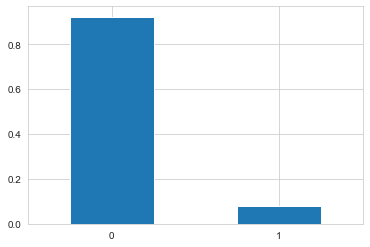

In [92]:
df1.TARGET.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.show()

## Create two DF based on Target column

In [93]:
# defaulted_df 
target1_df = df1[df1.TARGET == 1]

# not_defaulted_df
target0_df = df1[df1.TARGET == 0]
target1_df.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002      1         Cash loans           M            N   
26      100031      1         Cash loans           F            N   
40      100047      1         Cash loans           M            N   
42      100049      1         Cash loans           F            N   
81      100096      1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0            26               2                10.0                 6   
26           52               8                19.0                 6   
40           48               4                 4.0                 3   
42           37              10                 1.0                13   
81           68            1000                15.0                12   

    FLAG_MOBIL   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            1          Laborers              1.0                     2   
26           1     Cooking staff              1.0                     3   
40           1          Laborers              2.0                     2   
42           1       Sales staff              2.0                     3   
81           1  Blank Occupation              2.0                     2   

         ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_2  \
0   Business Entity Type 3      0.262949      0.139376                0   
26  Business Entity Type 3      0.548477      0.190706                0   
40  Business Entity Type 3      0.306841      0.320163                0   
42           Self-employed      0.674203      0.399676                0   
81                     XNA      0.023952      0.720944                0   

   age_group AMT_INCOME_TOTAL_Group AMT_CREDIT_Group  
0        <30               200-250k         400-600k  
26     50-60               100-150k           800-1M  
40     40-50               200-250k          1M-1.5M  
42     30-40               100-150k            <400K  
81       60+                50-100k            <400K

# Defaulter People Analysis with Target '1'
- Based on AMT_INCOME_TOTAL_Group and  AMT_CREDIT_Group defaulter Binning of continuous variables..
- Credit amount available Graph
- Defaulter income amount available Graph
- Based on age group more defaulter.
- Defaulter based on family status
- Credit amount and Age outliers
- Which type suite is more defaulter
- Which income type is more defaulter
- Combine suite type/Income type with Grapth
- Outlier between Total income and Credit
- Which Contract(LOAN) type is more defaulter
- Male are more defaulter or female
- Which Contract Type is more defaulter between Genter M/F

#### # Based on age group more defaulter.

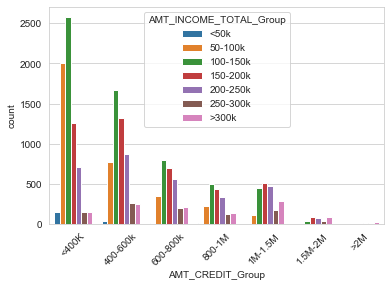

In [95]:
# Based on AMT_INCOME_TOTAL_Group and  AMT_CREDIT_Group defaulter Binning of continuous variables..
sns.countplot(x = "AMT_CREDIT_Group", hue= 'AMT_INCOME_TOTAL_Group', data = target1_df)
plt.xticks(rotation=45)
plt.show()
# Maximum Peoples are defaulter because their credit is <400k and Max income is 100-150K

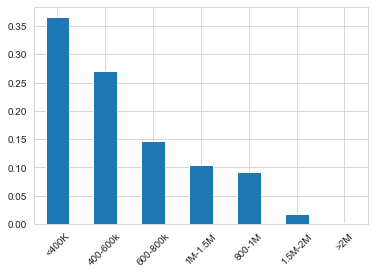

In [96]:
# Credit amount available 
target1_df.AMT_CREDIT_Group.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()
# maximum defaulter peoples are having credit amount <400K

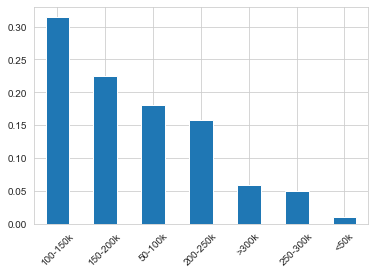

In [97]:
# defaulter income amount available 
target1_df.AMT_INCOME_TOTAL_Group.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()
# maximum total defaulter income is between 100-15K

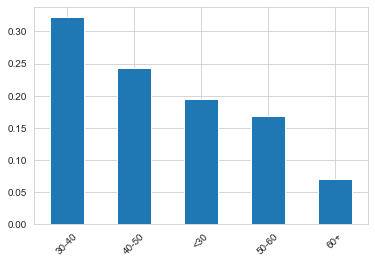

In [98]:
# Based on age group more defaulter Binning of continuous variables..

target1_df.age_group.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()

# 30-40 age group peoples are more defaulter.

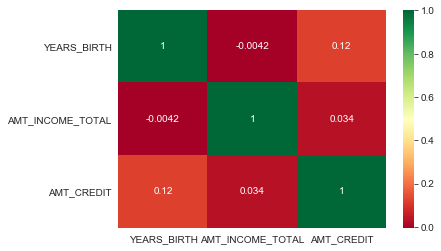

In [17]:
# Combine heatmap with age/total income and balance with Grapth
sns.heatmap(target1_df[['YEARS_BIRTH', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr(), annot=True, cmap='RdYlGn')
plt.show()

#### Defaulter based on family status

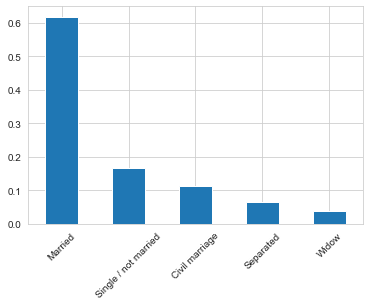

In [18]:
target1_df.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()

#### Credit amount and Age outliers

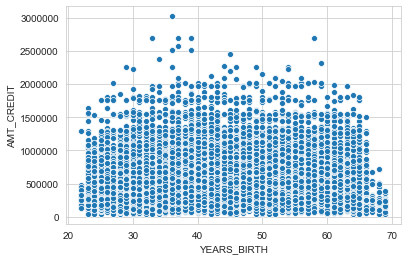

In [99]:
sns.scatterplot(x="YEARS_BIRTH", y="AMT_CREDIT", data=target1_df)
plt.show()

#### Which type suite is more defaulter

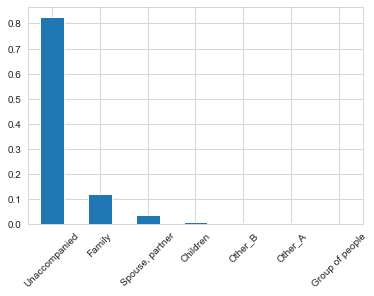

In [20]:
target1_df.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()
# Found that mostly "Unaccompanied" is more defaulter

#### Which income type is more defaulter

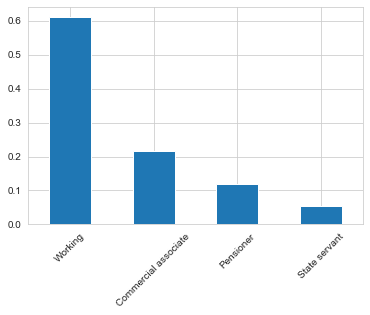

In [21]:
target1_df.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()
# Found that mostly "workings" are defaulter

#### Combine suite type/Income type with Grapth

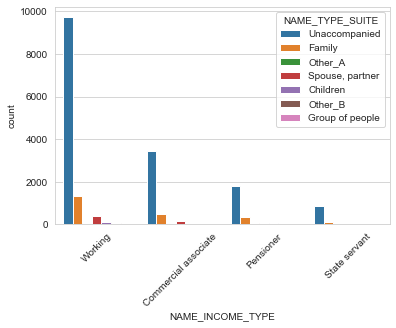

In [22]:
sns.countplot(x = "NAME_INCOME_TYPE", hue= 'NAME_TYPE_SUITE', data = target1_df)
plt.xticks(rotation=45)
plt.show()

# People who are working and income type is "Unaccompanied". those are more defaulter.

#### Outlier between Total income and Credit

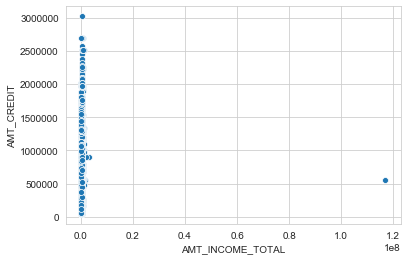

In [23]:
sns.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", data=target1_df)
plt.show()
# Outlier between income and credit

#### Which Contract(LOAN) type is more defaulter

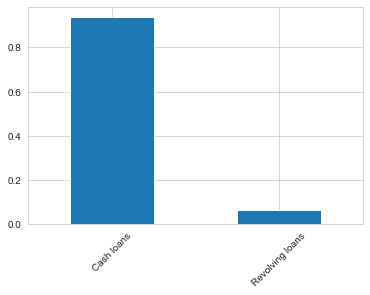

In [24]:
target1_df.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()

# Cash Loans type are more defaulter then Revolving Loans

#### Male are more defaulter or female

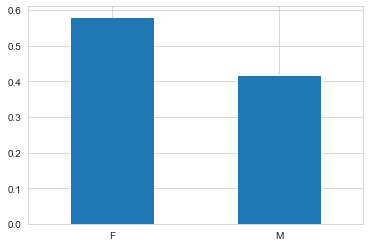

In [25]:
target1_df.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.show()

# More Loan has been taken by Female.

#### Which Contract Type is more defaulter between Genter M/F

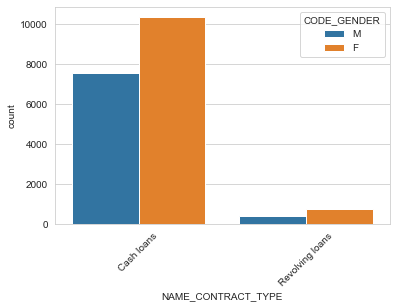

In [26]:
sns.countplot(x = "NAME_CONTRACT_TYPE", hue= 'CODE_GENDER', data = target1_df)
plt.xticks(rotation=45)
plt.show()

# As we can see Cash loans and Revolving Loans both have More Female defaulter.

# Non Defaulter Analysis, Where Target is '0'
- Based on AMT_INCOME_TOTAL_Group and  AMT_CREDIT_Group defaulter Binning of continuous variables..
- Based on age group non defaulter.
- Non-Defaulter based on family status
- Credit amount and Age outliers
- Which type suite is more defaulter
- Which income type is more defaulter
- Combine suite type/Income type with Grapth
- Outlier between Total income and Credit
- Which Contract(LOAN) type is more defaulter
- Male are more defaulter or female
- Which Contract Type is more non-defaulter between Genter M/F

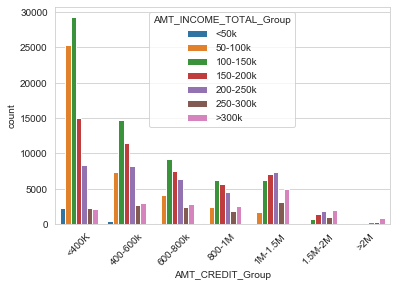

In [100]:
# Based on AMT_INCOME_TOTAL_Group and  AMT_CREDIT_Group defaulter Binning of continuous variables..
sns.countplot(x = "AMT_CREDIT_Group", hue= 'AMT_INCOME_TOTAL_Group', data = target0_df)
plt.xticks(rotation=45)
plt.show()
# Maximum Peoples are not defaulter because their credit is <400k and Max income is 100-150K

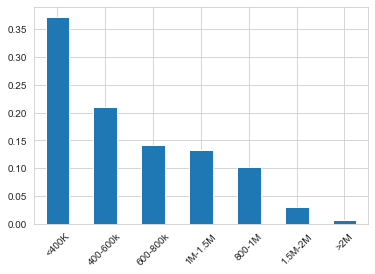

In [101]:
# Credit amount available 
target0_df.AMT_CREDIT_Group.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()
# maximum defaulter peoples are having credit amount <400K

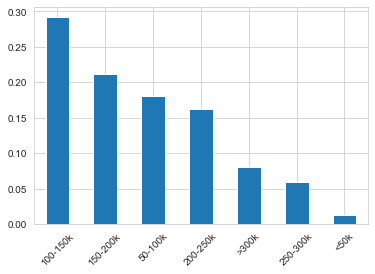

In [102]:
# defaulter income amount available 
target0_df.AMT_INCOME_TOTAL_Group.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()
# maximum total defaulter income is between 100-15K

#### Based on age group more not defaulter.

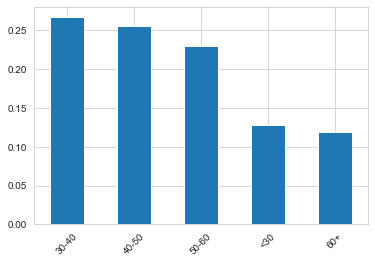

In [103]:
target0_df.age_group.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()

# 30-40 and 40-50 age group peoples are more non defaulter.

#### Non-Defaulter based on family status

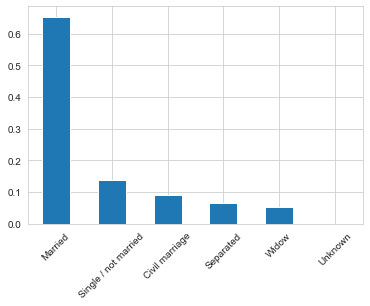

In [28]:
target0_df.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()

#### Credit amount and Age outliers

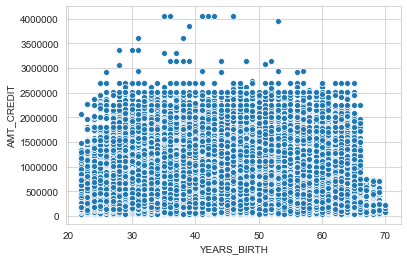

In [29]:
sns.scatterplot(x="YEARS_BIRTH", y="AMT_CREDIT", data=target0_df)
plt.show()

#### Which type suite is more non-defaulter

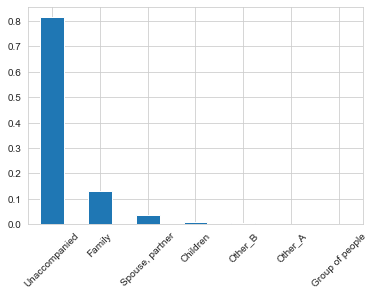

In [30]:
target0_df.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()

#### Which income type is more non-defaulter

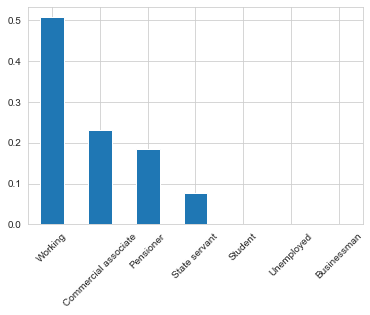

In [31]:
target0_df.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.show()
# Found that mostly "workings" are non-defaulter too

#### Male are more non-defaulter or female

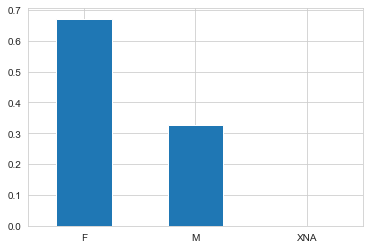

In [32]:
target0_df.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.show()
# More Loan has been taken by Female.

#### Which Contract Type is more non-defaulter between Genter M/F

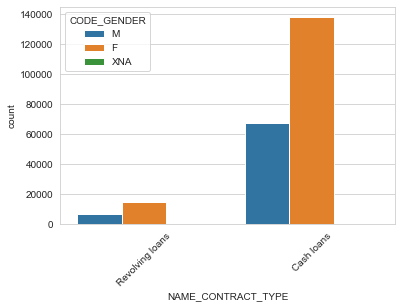

In [33]:
sns.countplot(x = "NAME_CONTRACT_TYPE", hue= 'CODE_GENDER', data = target0_df)
plt.xticks(rotation=45)
plt.show()
# As we can see Cash loans and Revolving Loans both have More Female non-defaulter.

### Calculate the non-defulter total income and monthly EMI analysis.

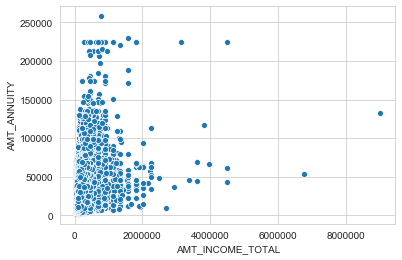

In [34]:
sns.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_ANNUITY", data=target0_df)
plt.show()

# Outlier between income and credit for not defaulter

#### Calculate the defulter and non-defaulter occupation based analysis.

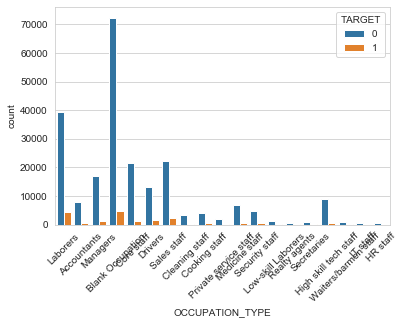

In [35]:
sns.countplot(x = "OCCUPATION_TYPE", hue= 'TARGET', data = df1)
plt.xticks(rotation = 45)
plt.show()
# More defaulters are laboreres.

# Cleaning of Merge both CSV (Application_data and Previous_data)

#### Info of merge application 

In [36]:
df3.info(max_cols=135)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686668 entries, 0 to 1686667
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(125), int64(1), object(32)
memory usage: 2.0+ GB


## droup column with null more than 40%

In [37]:
df3 = df3.loc[:, df3.isnull().mean() < .4]

In [39]:
df3.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.152083
NAME_CONTRACT_TYPE_x            0.152083
CODE_GENDER                     0.152083
FLAG_OWN_CAR                    0.152083
FLAG_OWN_REALTY                 0.152083
CNT_CHILDREN                    0.152083
AMT_INCOME_TOTAL                0.152083
AMT_CREDIT_x                    0.152083
AMT_ANNUITY_x                   0.152138
AMT_GOODS_PRICE_x               0.152805
NAME_TYPE_SUITE_x               0.154473
NAME_INCOME_TYPE                0.152083
NAME_EDUCATION_TYPE             0.152083
NAME_FAMILY_STATUS              0.152083
NAME_HOUSING_TYPE               0.152083
REGION_POPULATION_RELATIVE      0.152083
DAYS_BIRTH                      0.152083
DAYS_EMPLOYED                   0.152083
DAYS_REGISTRATION               0.152083
DAYS_ID_PUBLISH                 0.152083
FLAG_MOBIL                      0.152083
FLAG_EMP_PHONE                  0.152083
FLAG_WORK_PHONE                 0.152083
FLAG_CONT_MOBILE

#### droup column

In [38]:
df3.drop(['SK_ID_CURR','FLAG_OWN_CAR','DAYS_EMPLOYED',
         'DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
          'FLAG_CONT_MOBILE','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START_x',
         'HOUR_APPR_PROCESS_START_x','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
          'LIVE_REGION_NOT_WORK_REGION',
         'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2',
         'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
         'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','SK_ID_PREV','AMT_GOODS_PRICE_x','NAME_HOUSING_TYPE',
          'REGION_POPULATION_RELATIVE',
         'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
         'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
         'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
         'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
         'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
         'AMT_GOODS_PRICE_y','WEEKDAY_APPR_PROCESS_START_y','HOUR_APPR_PROCESS_START_y',
         'NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE','NAME_PORTFOLIO','NAME_PRODUCT_TYPE',
         'PRODUCT_COMBINATION'], axis=1, inplace=True)

In [39]:
# Null count after drop
df3.isnull().mean()

TARGET                         0.152083
NAME_CONTRACT_TYPE_x           0.152083
CODE_GENDER                    0.152083
FLAG_OWN_REALTY                0.152083
CNT_CHILDREN                   0.152083
AMT_INCOME_TOTAL               0.152083
AMT_CREDIT_x                   0.152083
AMT_ANNUITY_x                  0.152138
NAME_TYPE_SUITE_x              0.154473
NAME_INCOME_TYPE               0.152083
NAME_EDUCATION_TYPE            0.152083
NAME_FAMILY_STATUS             0.152083
DAYS_BIRTH                     0.152083
FLAG_PHONE                     0.152083
FLAG_EMAIL                     0.152083
CNT_FAM_MEMBERS                0.152084
REGION_RATING_CLIENT           0.152083
ORGANIZATION_TYPE              0.152083
AMT_REQ_CREDIT_BUREAU_HOUR     0.250390
AMT_REQ_CREDIT_BUREAU_DAY      0.250390
AMT_REQ_CREDIT_BUREAU_WEEK     0.250390
AMT_REQ_CREDIT_BUREAU_MON      0.250390
AMT_REQ_CREDIT_BUREAU_QRT      0.250390
AMT_REQ_CREDIT_BUREAU_YEAR     0.250390
NAME_CONTRACT_TYPE_y           0.009755


### Data Cleaning 

#### Gender

In [41]:
# Find Gender count
df3.CODE_GENDER.value_counts(normalize=True)

F      0.674628
M      0.325334
XNA    0.000038
Name: CODE_GENDER, dtype: float64

In [42]:
# Descibe
df3.CODE_GENDER.describe()

count     1430155
unique          3
top             F
freq       964822
Name: CODE_GENDER, dtype: object

In [44]:
 # Update Null value , with mode
df3['CODE_GENDER'].fillna('F',inplace=True)

#### FLAG_OWN_REALTY

In [45]:
df3.FLAG_OWN_REALTY.value_counts(normalize=True)

Y    0.721371
N    0.278629
Name: FLAG_OWN_REALTY, dtype: float64

In [46]:
df3['FLAG_OWN_REALTY'].fillna('Y',inplace=True)

#### TARGET

In [47]:
df3.TARGET.value_counts(normalize=True)

0.0    0.913758
1.0    0.086242
Name: TARGET, dtype: float64

In [48]:
# Assume Null mean reject 
df3['TARGET'].fillna(0,inplace=True)

In [49]:
df3.drop(['CODE_REJECT_REASON','NAME_GOODS_CATEGORY','CHANNEL_TYPE'],axis=1,inplace=True)

#### NAME_CONTRACT_TYPE_x

In [50]:
df3 = df3[~df3.NAME_CONTRACT_TYPE_x.isnull()]

#### AMT_ANNUITY

In [51]:
df3.AMT_ANNUITY_x.median()

24916.5

In [52]:
df3.AMT_ANNUITY_x.mean()

27042.029965134378

In [53]:
df3.AMT_ANNUITY_y.median()

11223.765

In [54]:
df3.AMT_ANNUITY_y.mean()

15837.184951997739

In [55]:
df3.AMT_ANNUITY_x.fillna(df3.AMT_ANNUITY_x.mean(),inplace=True)
df3.AMT_ANNUITY_y.fillna(df3.AMT_ANNUITY_y.mean(),inplace=True)

#### CNT_FAM_MEMBERS

In [56]:
print(df3.CNT_FAM_MEMBERS.median())
print(df3.CNT_FAM_MEMBERS.mean())

2.0
2.149005735749951


In [57]:
df3.CNT_FAM_MEMBERS.fillna(df3.CNT_FAM_MEMBERS.median(),inplace=True)

In [58]:
df3.TARGET = df3.TARGET.astype(int)

In [59]:
df3.CNT_CHILDREN = df3.CNT_CHILDREN.astype(int)
df3.CNT_FAM_MEMBERS = df3.CNT_FAM_MEMBERS.astype(int)
df3.REGION_RATING_CLIENT = df3.REGION_RATING_CLIENT.astype(int)



In [60]:
df3.shape

(1430155, 37)

In [61]:
df3[~df3.NAME_CONTRACT_STATUS.isnull()]

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  \
0             1           Cash loans           M               Y   
1             0           Cash loans           F               N   
2             0           Cash loans           F               N   
3             0           Cash loans           F               N   
4             0      Revolving loans           M               Y   
...         ...                  ...         ...             ...   
1430150       0           Cash loans           F               N   
1430151       0           Cash loans           F               N   
1430152       0           Cash loans           F               N   
1430153       0           Cash loans           F               N   
1430154       0           Cash loans           F               N   

         CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0                   0          202500.0      406597.5        24700.5   
1                   0          270000.0     1293502.5        35698.5   
2                   0          270000.0     1293502.5        35698.5   
3                   0          270000.0     1293502.5        35698.5   
4                   0           67500.0      135000.0         6750.0   
...               ...               ...           ...            ...   
1430150             0          157500.0      675000.0        49117.5   
1430151             0          157500.0      675000.0        49117.5   
1430152             0          157500.0      675000.0        49117.5   
1430153             0          157500.0      675000.0        49117.5   
1430154             0          157500.0      675000.0        49117.5   

        NAME_TYPE_SUITE_x      NAME_INCOME_TYPE  \
0           Unaccompanied               Working   
1                  Family         State servant   
2                  Family         State servant   
3                  Family         State servant   
4           Unaccompanied               Working   
...                   ...                   ...   
1430150     Unaccompanied  Commercial associate   
1430151     Unaccompanied  Commercial associate   
1430152     Unaccompanied  Commercial associate   
1430153     Unaccompanied  Commercial associate   
1430154     Unaccompanied  Commercial associate   

                   NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  DAYS_BIRTH  \
0        Secondary / secondary special  Single / not married     -9461.0   
1                     Higher education               Married    -16765.0   
2                     Higher education               Married    -16765.0   
3                     Higher education               Married    -16765.0   
4        Secondary / secondary special  Single / not married    -19046.0   
...                                ...                   ...         ...   
1430150               Higher education               Married    -16856.0   
1430151               Higher education               Married    -16856.0   
1430152               Higher education               Married    -16856.0   
1430153               Higher education               Married    -16856.0   
1430154               Higher education               Married    -16856.0   

         FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0               1.0         0.0                1                     2   
1               1.0         0.0                2                     1   
2               1.0         0.0                2                     1   
3               1.0         0.0                2                     1   
4               1.0         0.0                1                     2   
...             ...         ...              ...                   ...   
1430150         1.0         0.0                2                     1   
1430151         1.0         0.0                2                     1   
1430152         1.0         0.0                2                     1   
1430153         1.0         0.0                2             

In [62]:
# Remove NAME_CONTRACT_STATUS with null because count is very less
df3 = df3[~df3.NAME_CONTRACT_STATUS.isnull()]

### Univariant

In [63]:
df3.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0       1           Cash loans           M               Y             0   
1       0           Cash loans           F               N             0   
2       0           Cash loans           F               N             0   
3       0           Cash loans           F               N             0   
4       0      Revolving loans           M               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x NAME_TYPE_SUITE_x  \
0          202500.0      406597.5        24700.5     Unaccompanied   
1          270000.0     1293502.5        35698.5            Family   
2          270000.0     1293502.5        35698.5            Family   
3          270000.0     1293502.5        35698.5            Family   
4           67500.0      135000.0         6750.0     Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2    State servant               Higher education               Married   
3    State servant               Higher education               Married   
4          Working  Secondary / secondary special  Single / not married   

   DAYS_BIRTH  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0     -9461.0         1.0         0.0                1                     2   
1    -16765.0         1.0         0.0                2                     1   
2    -16765.0         1.0         0.0                2                     1   
3    -16765.0         1.0         0.0                2                     1   
4    -19046.0         1.0         0.0                1                     2   

        ORGANIZATION_TYPE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0  Business Entity Type 3                         0.0   
1                  School                         0.0   
2                  School                         0.0   
3                  School                         0.0   
4              Government                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  \
0                         1.0       Consumer loans       9251.775   
1                         0.0           Cash loans      98356.995   
2                         0.0       Consumer loans      64567.665   
3                         0.0       Consumer loans       6737.310   
4                         0.0       Consumer loans       5357.250   

   AMT_APPLICATION  AMT_CREDIT_y FLAG_LAST_APPL_PER_CONTRACT  \
0         179055.0      179055.0                           Y   
1         900000.0     1035882.0                           Y   
2         337500.0      348637.5                           Y   
3          68809.5       68053.5                           Y   
4          24282.0       20106.0                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                     1.0             Approved         -606.0   
1                     1.0             Approved         -746.0   
2                     1.0             Approved         -828.0   
3                     1.0             Approved        -2341.0   
4        

In [64]:
# Change the column name and convert data into year.
df3.rename(columns={"DAYS_BIRTH":"YEARS_BIRTH"},inplace=True);

In [65]:
df3.YEARS_BIRTH = df3.YEARS_BIRTH.apply(lambda x: abs(x//365))

df3.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0       1           Cash loans           M               Y             0   
1       0           Cash loans           F               N             0   
2       0           Cash loans           F               N             0   
3       0           Cash loans           F               N             0   
4       0      Revolving loans           M               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x NAME_TYPE_SUITE_x  \
0          202500.0      406597.5        24700.5     Unaccompanied   
1          270000.0     1293502.5        35698.5            Family   
2          270000.0     1293502.5        35698.5            Family   
3          270000.0     1293502.5        35698.5            Family   
4           67500.0      135000.0         6750.0     Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2    State servant               Higher education               Married   
3    State servant               Higher education               Married   
4          Working  Secondary / secondary special  Single / not married   

   YEARS_BIRTH  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0         26.0         1.0         0.0                1                     2   
1         46.0         1.0         0.0                2                     1   
2         46.0         1.0         0.0                2                     1   
3         46.0         1.0         0.0                2                     1   
4         53.0         1.0         0.0                1                     2   

        ORGANIZATION_TYPE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0  Business Entity Type 3                         0.0   
1                  School                         0.0   
2                  School                         0.0   
3                  School                         0.0   
4              Government                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  \
0                         1.0       Consumer loans       9251.775   
1                         0.0           Cash loans      98356.995   
2                         0.0       Consumer loans      64567.665   
3                         0.0       Consumer loans       6737.310   
4                         0.0       Consumer loans       5357.250   

   AMT_APPLICATION  AMT_CREDIT_y FLAG_LAST_APPL_PER_CONTRACT  \
0         179055.0      179055.0                           Y   
1         900000.0     1035882.0                           Y   
2         337500.0      348637.5                           Y   
3          68809.5       68053.5                           Y   
4          24282.0       20106.0                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                     1.0             Approved         -606.0   
1                     1.0             Approved         -746.0   
2                     1.0             Approved         -828.0   
3                     1.0             Approved        -2341.0   
4  

#### DAYS_DECISION

In [66]:
df3.DAYS_DECISION = df3.DAYS_DECISION.apply(lambda x: abs(x//365))

df3.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0       1           Cash loans           M               Y             0   
1       0           Cash loans           F               N             0   
2       0           Cash loans           F               N             0   
3       0           Cash loans           F               N             0   
4       0      Revolving loans           M               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x NAME_TYPE_SUITE_x  \
0          202500.0      406597.5        24700.5     Unaccompanied   
1          270000.0     1293502.5        35698.5            Family   
2          270000.0     1293502.5        35698.5            Family   
3          270000.0     1293502.5        35698.5            Family   
4           67500.0      135000.0         6750.0     Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2    State servant               Higher education               Married   
3    State servant               Higher education               Married   
4          Working  Secondary / secondary special  Single / not married   

   YEARS_BIRTH  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0         26.0         1.0         0.0                1                     2   
1         46.0         1.0         0.0                2                     1   
2         46.0         1.0         0.0                2                     1   
3         46.0         1.0         0.0                2                     1   
4         53.0         1.0         0.0                1                     2   

        ORGANIZATION_TYPE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0  Business Entity Type 3                         0.0   
1                  School                         0.0   
2                  School                         0.0   
3                  School                         0.0   
4              Government                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  \
0                         1.0       Consumer loans       9251.775   
1                         0.0           Cash loans      98356.995   
2                         0.0       Consumer loans      64567.665   
3                         0.0       Consumer loans       6737.310   
4                         0.0       Consumer loans       5357.250   

   AMT_APPLICATION  AMT_CREDIT_y FLAG_LAST_APPL_PER_CONTRACT  \
0         179055.0      179055.0                           Y   
1         900000.0     1035882.0                           Y   
2         337500.0      348637.5                           Y   
3          68809.5       68053.5                           Y   
4          24282.0       20106.0                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                     1.0             Approved            2.0   
1                     1.0             Approved            3.0   
2                     1.0             Approved            3.0   
3                     1.0             Approved            7.0   
4  

In [67]:
df3.DAYS_DECISION.fillna(df3.DAYS_DECISION.median(),inplace=True)

In [68]:
df3.DAYS_DECISION = df3.DAYS_DECISION.astype(int)

#### NAME_CONTRACT_STATUS 

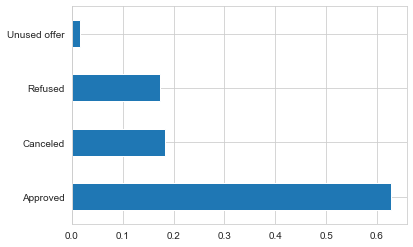

In [69]:
# Check Application status 
df3.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.barh()
plt.show()

#### NAME_CONTRACT_TYPE_x

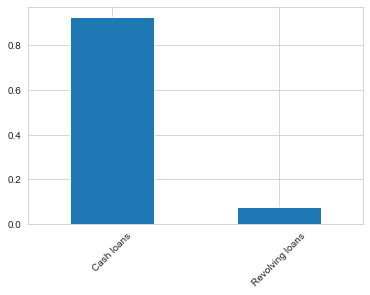

In [73]:
# Check loan type 
df3.NAME_CONTRACT_TYPE_x.value_counts(normalize=True).plot.bar()
plt.xticks(rotation = 45)
plt.show()

#### CODE_GENDER

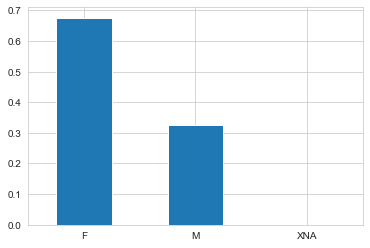

In [74]:
# Check Gender who applied more loan
df3.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.xticks(rotation = 0)
plt.show()

#### TARGET

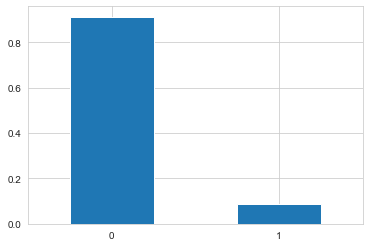

In [75]:
df3.TARGET.value_counts(normalize=True).plot.bar()
plt.xticks(rotation = 0)
plt.show()

#### NAME_INCOME_TYPE

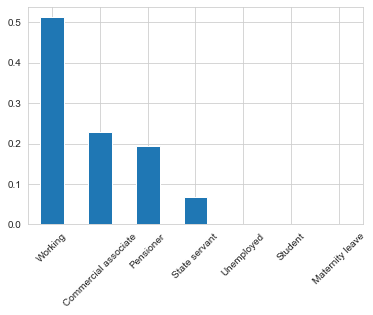

In [76]:
# Check Which type of employee taking more loan
df3.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.xticks(rotation = 45)
plt.show()

#### NAME_EDUCATION_TYPE

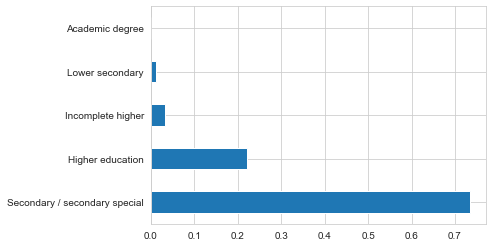

In [74]:
# Check Education on Client
df3.NAME_EDUCATION_TYPE	.value_counts(normalize=True).plot.barh()
plt.show()

#### NAME_FAMILY_STATUS

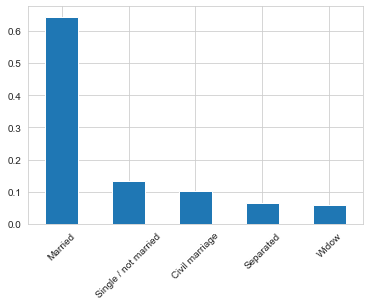

In [77]:
# Check client family status 
df3.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.xticks(rotation = 45)
plt.show()

#### YEARS_BIRTH

In [78]:
df3['age_group'] = pd.cut(df3.YEARS_BIRTH, [0,30,40,50,60,999], labels=['<30', '30-40', '40-50', '50-60', '60+'])

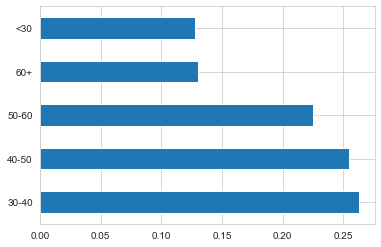

In [79]:
# Check Age of client who appling more loan
df3.age_group.value_counts(normalize=True).plot.barh()
plt.show()

## Bivariante(With Target)

#### Age Group

In [80]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1430154
Data columns (total 38 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   TARGET                       1413701 non-null  int64   
 1   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 2   CODE_GENDER                  1413701 non-null  object  
 3   FLAG_OWN_REALTY              1413701 non-null  object  
 4   CNT_CHILDREN                 1413701 non-null  int64   
 5   AMT_INCOME_TOTAL             1413701 non-null  float64 
 6   AMT_CREDIT_x                 1413701 non-null  float64 
 7   AMT_ANNUITY_x                1413701 non-null  float64 
 8   NAME_TYPE_SUITE_x            1410175 non-null  object  
 9   NAME_INCOME_TYPE             1413701 non-null  object  
 10  NAME_EDUCATION_TYPE          1413701 non-null  object  
 11  NAME_FAMILY_STATUS           1413701 non-null  object  
 12  YEARS_BIRTH                 

In [81]:
df3.NAME_CONTRACT_STATUS = df3.NAME_CONTRACT_STATUS.astype("category")

In [82]:
df3.age_group

0            <30
1          40-50
2          40-50
3          40-50
4          50-60
           ...  
1430150    40-50
1430151    40-50
1430152    40-50
1430153    40-50
1430154    40-50
Name: age_group, Length: 1413701, dtype: category
Categories (5, object): [<30 < 30-40 < 40-50 < 50-60 < 60+]

In [83]:
df3.NAME_CONTRACT_STATUS

0          Approved
1          Approved
2          Approved
3          Approved
4          Approved
             ...   
1430150    Approved
1430151     Refused
1430152     Refused
1430153    Approved
1430154    Approved
Name: NAME_CONTRACT_STATUS, Length: 1413701, dtype: category
Categories (4, object): [Approved, Canceled, Refused, Unused offer]

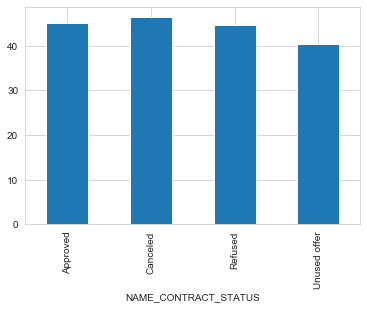

In [85]:
df3.groupby("NAME_CONTRACT_STATUS")['YEARS_BIRTH'].mean().plot.bar()
plt.show()

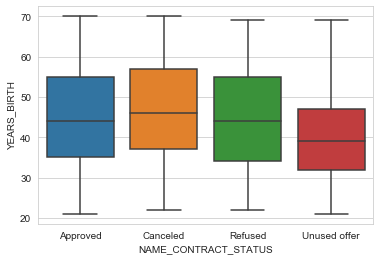

In [86]:
sns.boxplot(data=df3,x="NAME_CONTRACT_STATUS",y="YEARS_BIRTH")
plt.show()

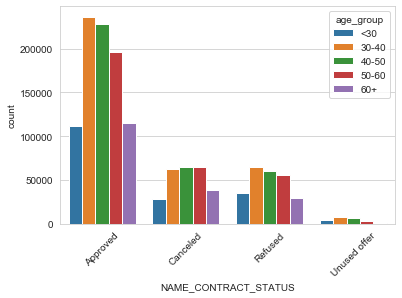

In [87]:
sns.countplot(x = "NAME_CONTRACT_STATUS", hue= 'age_group', data = df3)
plt.xticks(rotation=45)
plt.show()


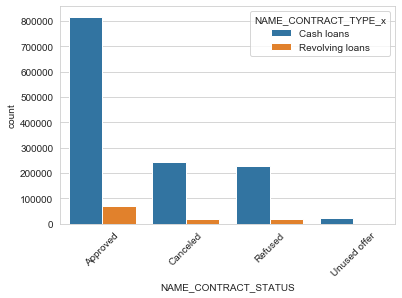

In [88]:
sns.countplot(x = "NAME_CONTRACT_STATUS", hue= 'NAME_CONTRACT_TYPE_x', data = df3)
plt.xticks(rotation=45)
plt.show()


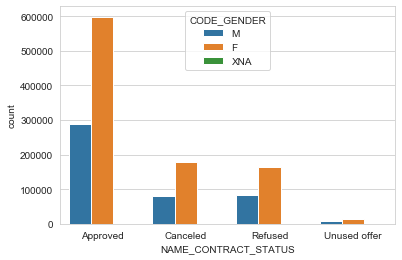

In [89]:
sns.countplot(x = "NAME_CONTRACT_STATUS", hue= 'CODE_GENDER', data = df3)

plt.show()

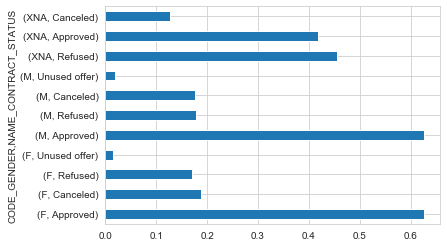

In [119]:
df3.groupby("CODE_GENDER")["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.barh()
plt.show()

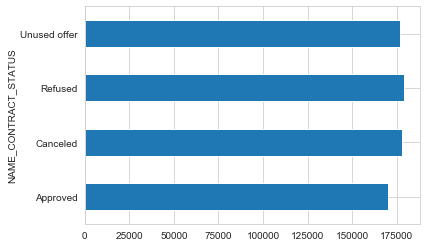

In [121]:
df3.groupby("NAME_CONTRACT_STATUS")["AMT_INCOME_TOTAL"].mean().plot.barh()
plt.show()

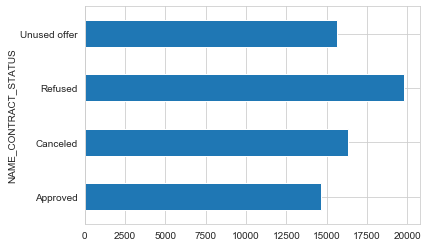

In [124]:
df3.groupby("NAME_CONTRACT_STATUS")["AMT_ANNUITY_y"].mean().plot.barh()
plt.show()

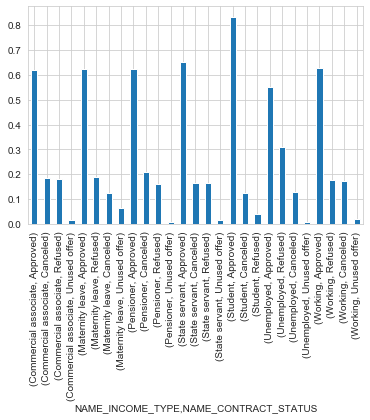

In [128]:
df3.groupby("NAME_INCOME_TYPE")["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.bar()
plt.show()

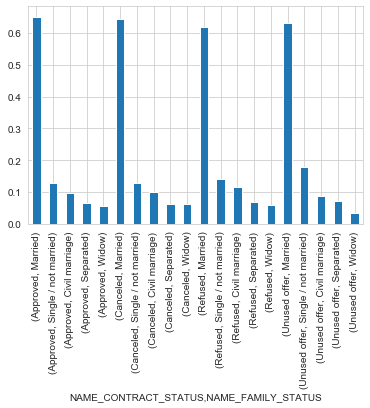

In [132]:
df3.groupby("NAME_CONTRACT_STATUS")["NAME_FAMILY_STATUS"].value_counts(normalize=True).plot.bar()
plt.show()


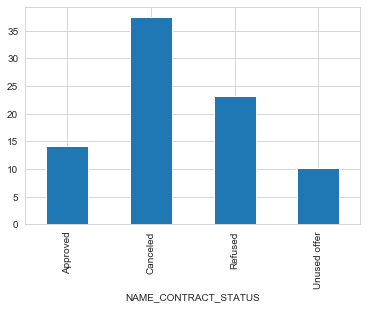

In [141]:
df3.groupby("NAME_CONTRACT_STATUS")["CNT_PAYMENT"].mean().plot.bar()
plt.show()
# df3.CNT_PAYMENT.value_counts()

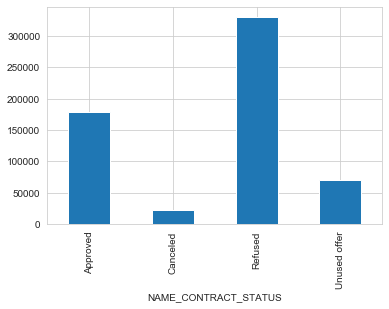

In [148]:
df3.groupby("NAME_CONTRACT_STATUS")["AMT_APPLICATION"].mean().plot.bar()
plt.show()
# df3.head()

# Conclusion

- We try to show many reason of rejection or approval of loan
- Try to find Outliers form Univariant and bivariate
- Perform Comparison for Target with many Column in application to see the reason  for any action(Rejection or Approval)
- Merge the both application and perform Univariate to see who applied the loan (Category)
- Perform bivariante on merge dataframe from ‘NAME_CONTRACT_STATUS’ with many column to see the reason of approval ,Canceled, Refused  
 